## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

homes = pd.read_csv('homes.csv')

#### Question 1: What is the distribution of home prices?

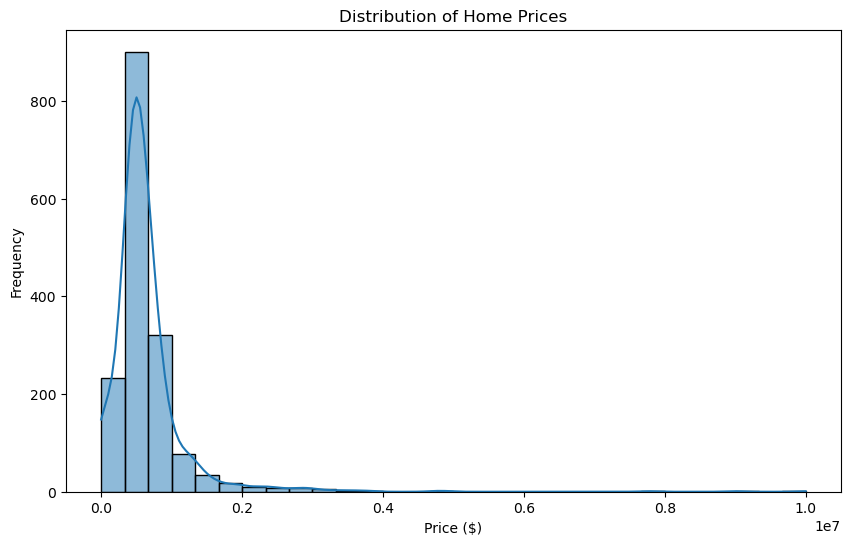

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(homes['Price'], bins=30, kde=True)
plt.title('Distribution of Home Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

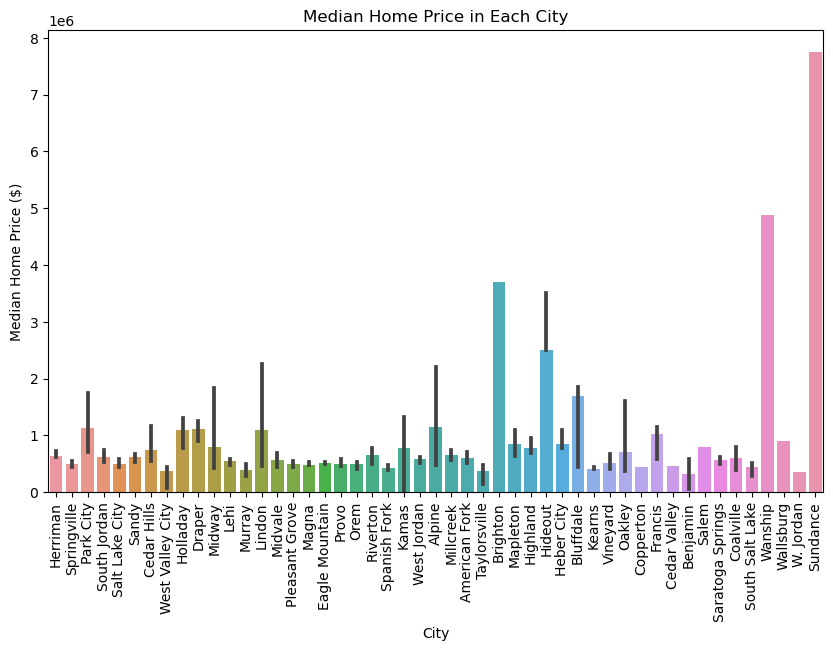

In [3]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Price', data=homes, estimator=np.median)
plt.title('Median Home Price in Each City')
plt.xlabel('City')
plt.ylabel('Median Home Price ($)')
plt.xticks(rotation=90)
plt.show()

#### Question 2: How does the number of bedrooms impact home prices?

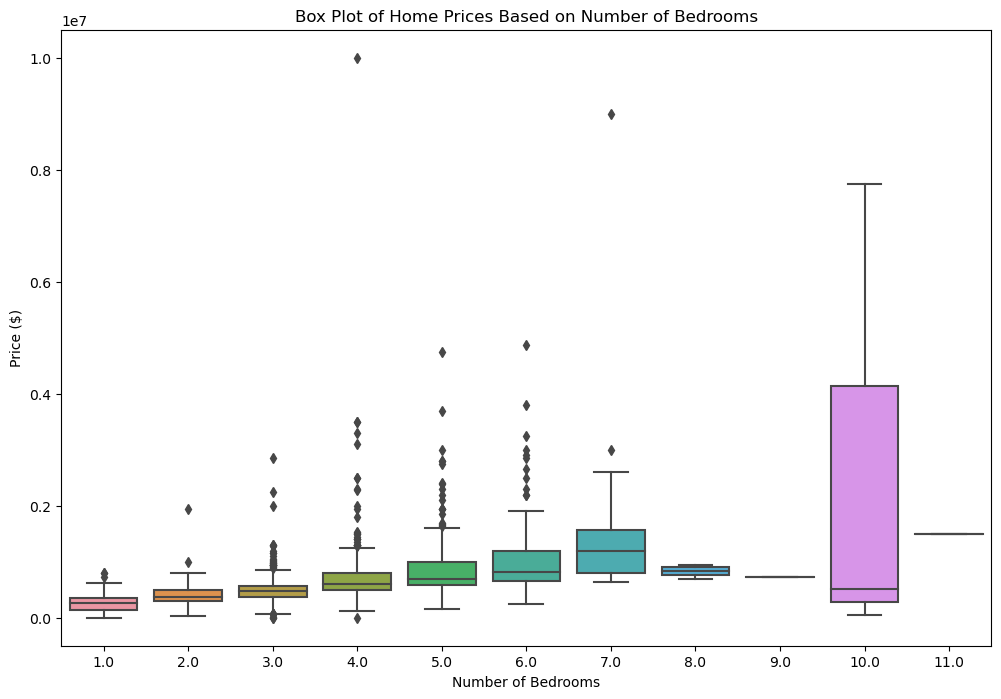

In [3]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Bedrooms', y='Price', data=homes)
plt.title('Box Plot of Home Prices Based on Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.show()

#### Question 3: Is there a correlation between home prices and square feet?

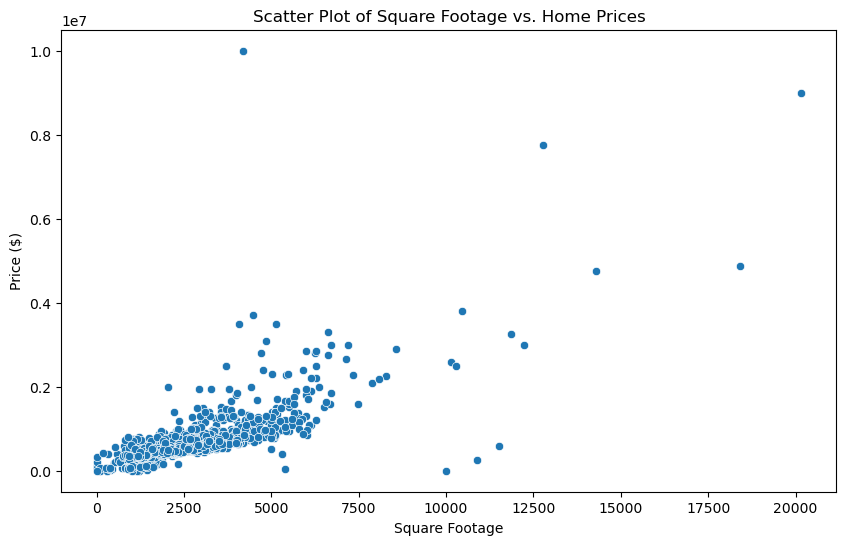

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sqft', y='Price', data=homes)
plt.title('Scatter Plot of Square Footage vs. Home Prices')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.show()

#### Question 4: What is average price per square foot in different cities?

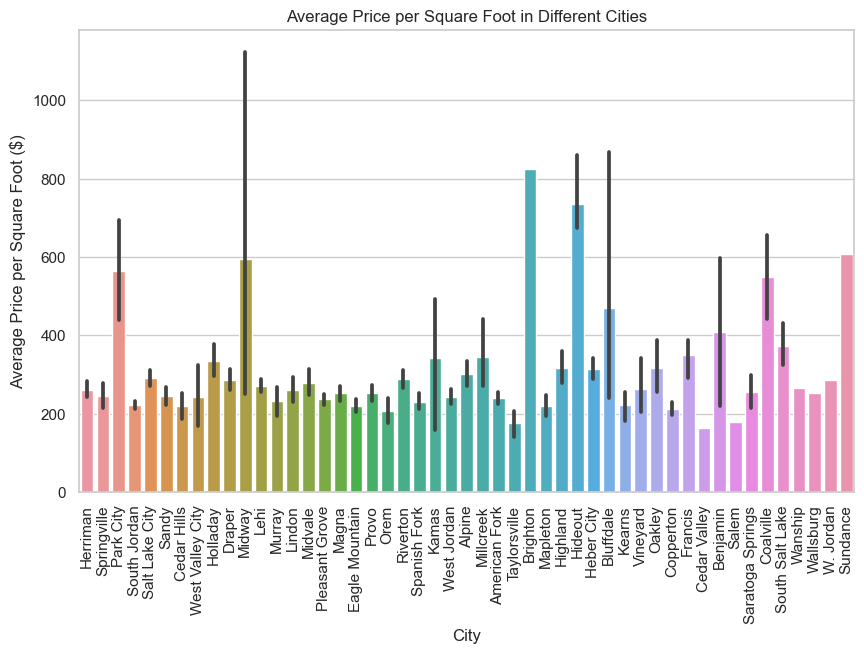

In [21]:
# homes['Price_per_sqft'] = homes['Price'] / homes['Sqft']

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Price_per_sqft', data=homes.drop(homes['Price_per_sqft'].nlargest(2).index))
plt.title('Average Price per Square Foot in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Price per Square Foot ($)')
plt.xticks(rotation=90)
plt.show()

#### Question 5: How does the number of bathrooms influence home prices?

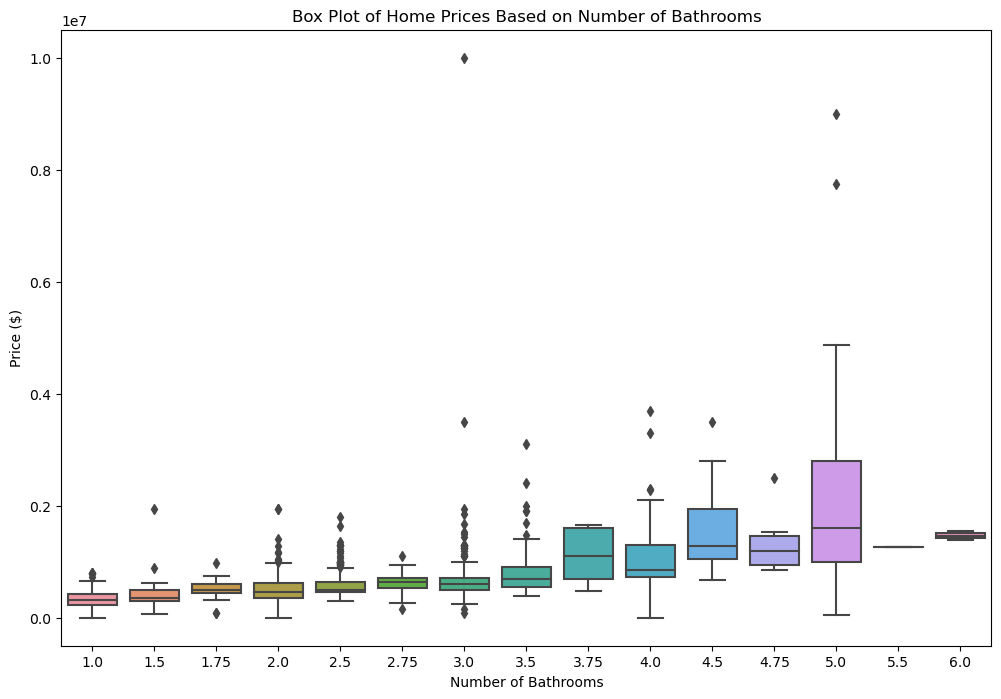

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Bathrooms', y='Price', data=homes)
plt.title('Box Plot of Home Prices Based on Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price ($)')
plt.show()

#### Other visuals

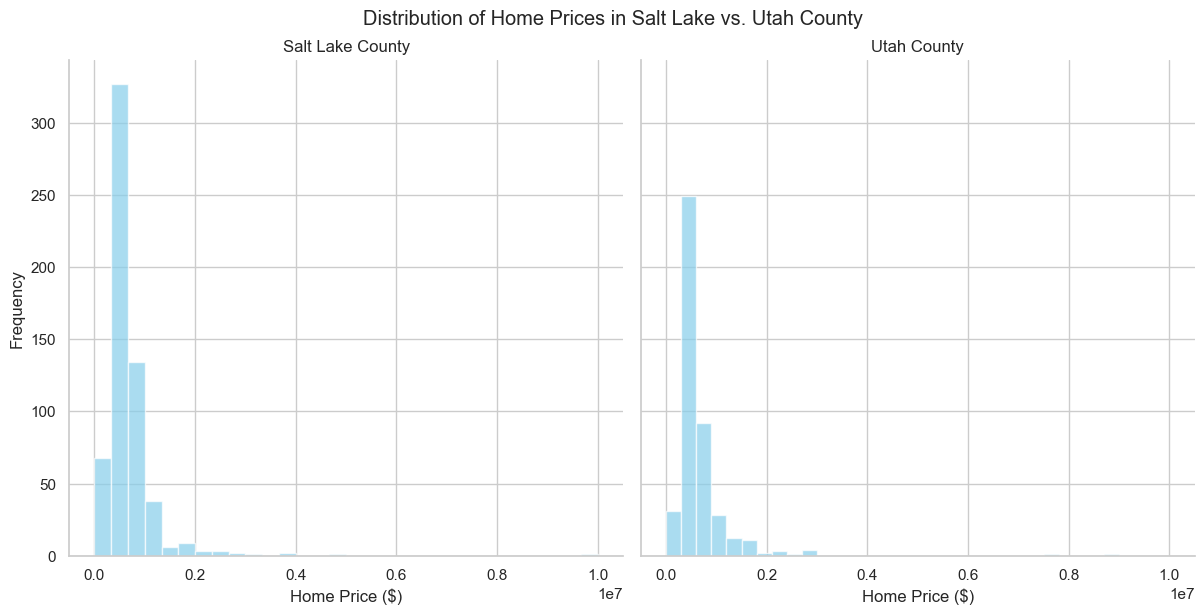

In [29]:
sns.set(style="whitegrid")
g = sns.FacetGrid(homes[homes['County'].isin(['Salt Lake County', 'Utah County'])], col='County', height=6, aspect=1)
g.map(plt.hist, 'Price', bins=30, color='skyblue', alpha=0.7)

# Set titles and labels
g.set_axis_labels('Home Price ($)', 'Frequency')
g.set_titles(col_template="{col_name}")

plt.suptitle('Distribution of Home Prices in Salt Lake vs. Utah County', y=1.02)
plt.show()

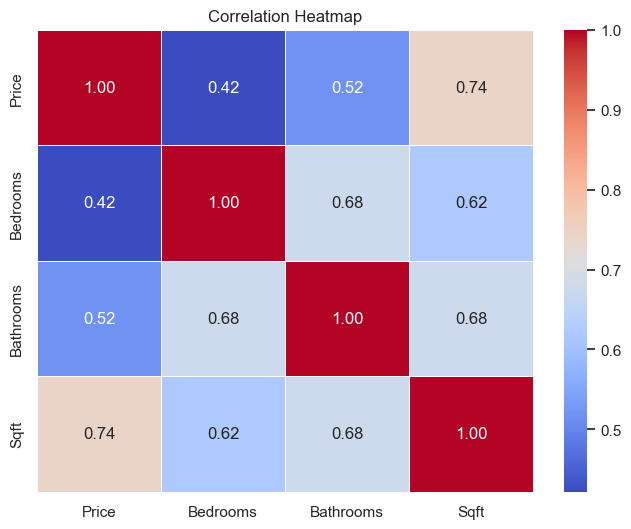

In [27]:
selected_columns = ['Price', 'Bedrooms', 'Bathrooms', 'Sqft']

correlation_matrix = homes[selected_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
homes['County'].value_counts()

Salt Lake County    595
Unknown             513
Utah County         435
Wasatch County       51
Summit County        29
Name: County, dtype: int64

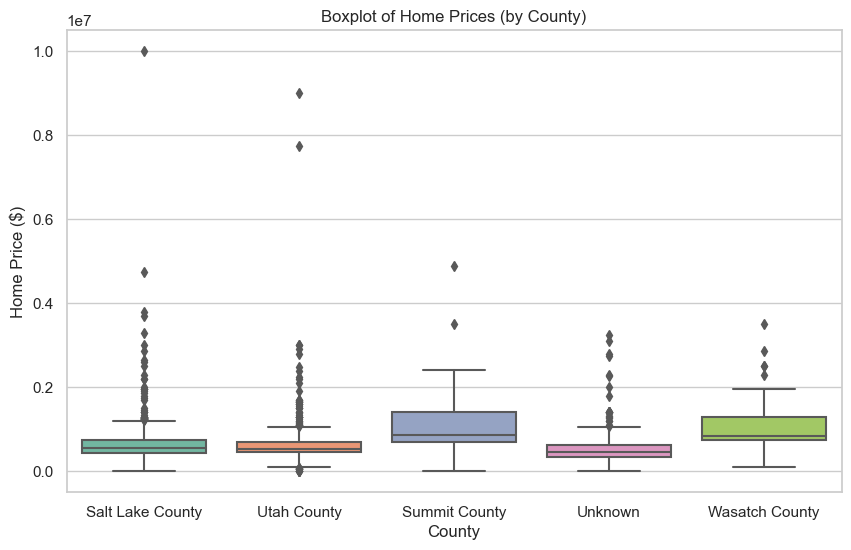

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=homes, x='County', y='Price', palette="Set2")
plt.title('Boxplot of Home Prices (by County)')
plt.xlabel('County')
plt.ylabel('Home Price ($)')
plt.show()

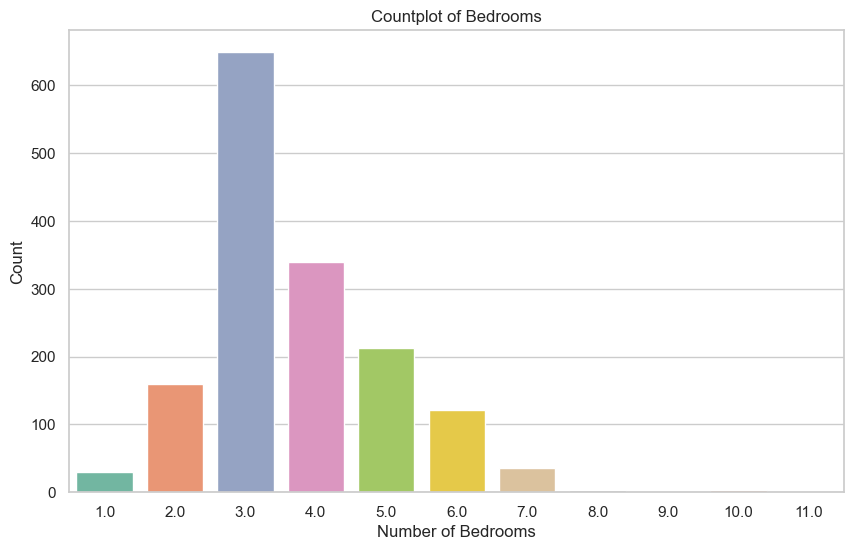

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=homes, x='Bedrooms', palette="Set2")
plt.title('Countplot of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

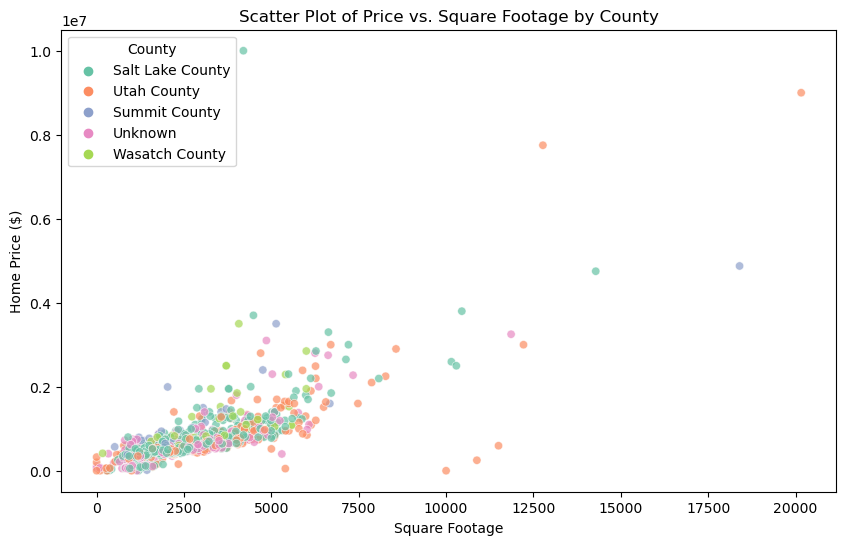

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=homes, x='Sqft', y='Price', hue='County', palette="Set2", alpha=0.7)
plt.title('Scatter Plot of Price vs. Square Footage by County')
plt.xlabel('Square Footage')
plt.ylabel('Home Price ($)')
plt.legend(title='County')
plt.show()

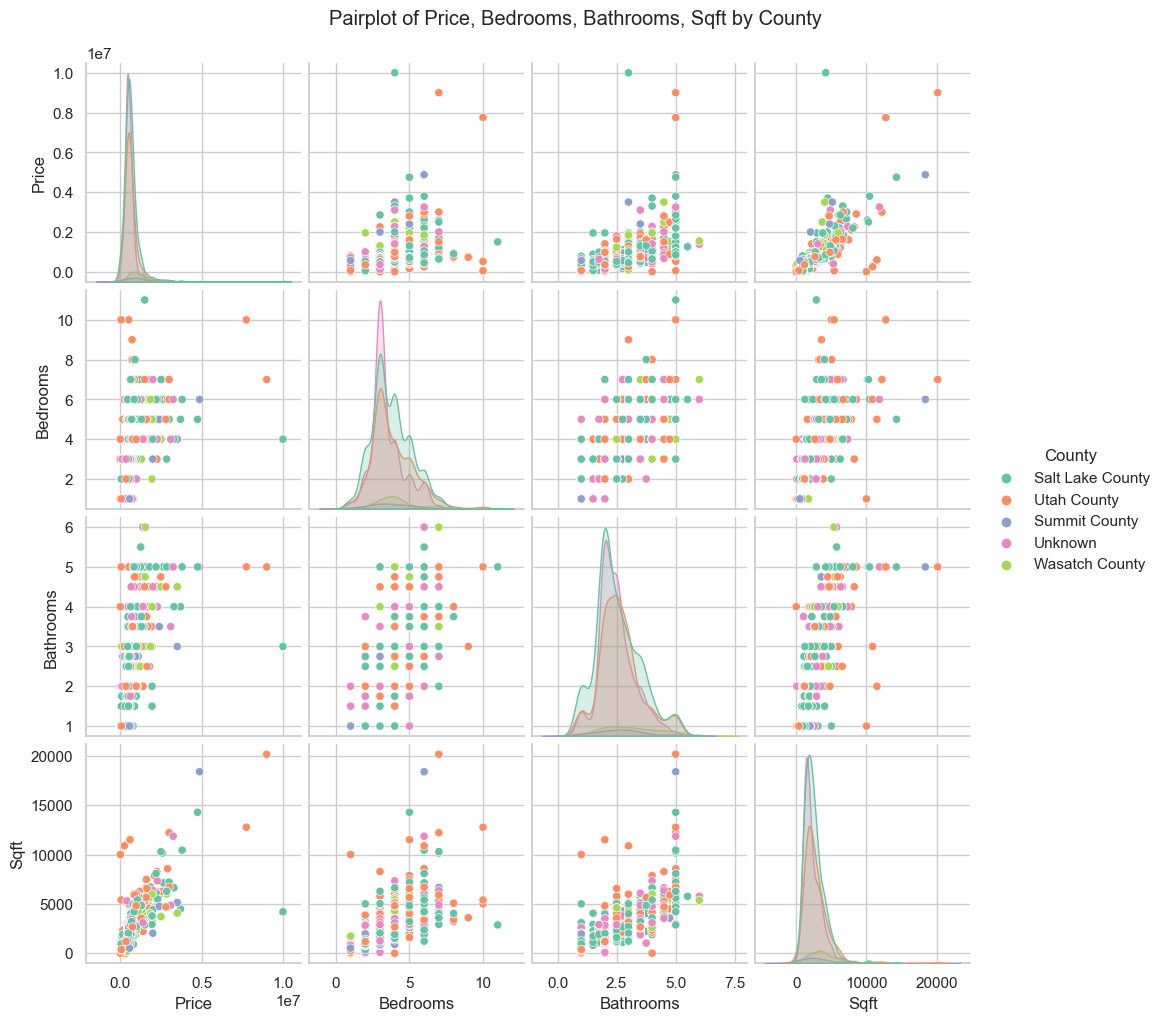

In [33]:
sns.pairplot(homes[['Price', 'Bedrooms', 'Bathrooms', 'Sqft', 'County']], hue='County', palette="Set2")
plt.suptitle('Pairplot of Price, Bedrooms, Bathrooms, Sqft by County', y=1.02)
plt.show()